# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

23:15:14 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=192414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=13679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=148046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=773366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

23:15:15 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=815566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=796482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

23:15:16 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=675936;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=991866;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

23:15:17 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=500382;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=314490;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

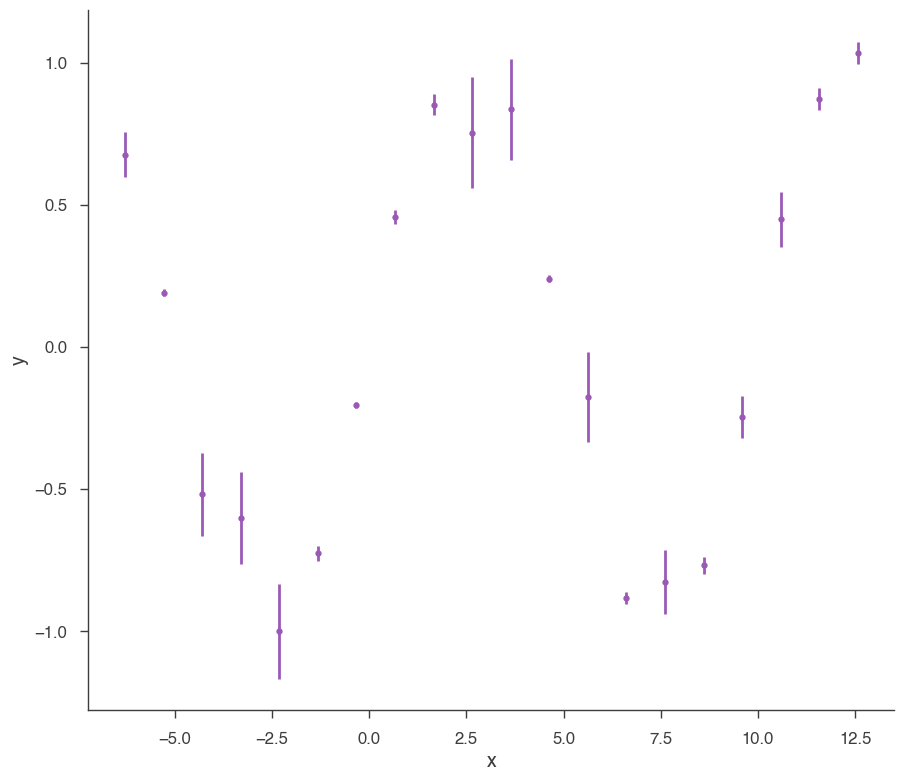

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=781159;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=984918;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:15:20 INFO      Mean acceptance fraction: 0.7134                                            ]8;id=341488;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=7555;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=310887;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=677672;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

23:15:21 INFO      fit restored to maximum of posterior                                         ]8;id=449234;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=449080;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0012 -0.0020 +0.0026) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.203117
total,-9.203117


Values of statistical measures:

,statistical measures
AIC,23.112116
BIC,24.397699
DIC,22.343609
PDIC,1.960622


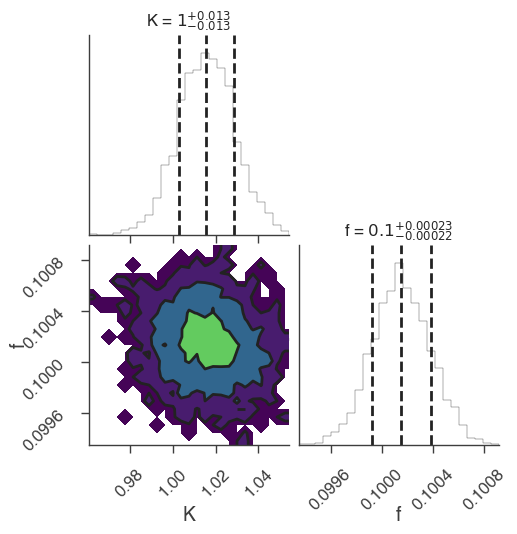

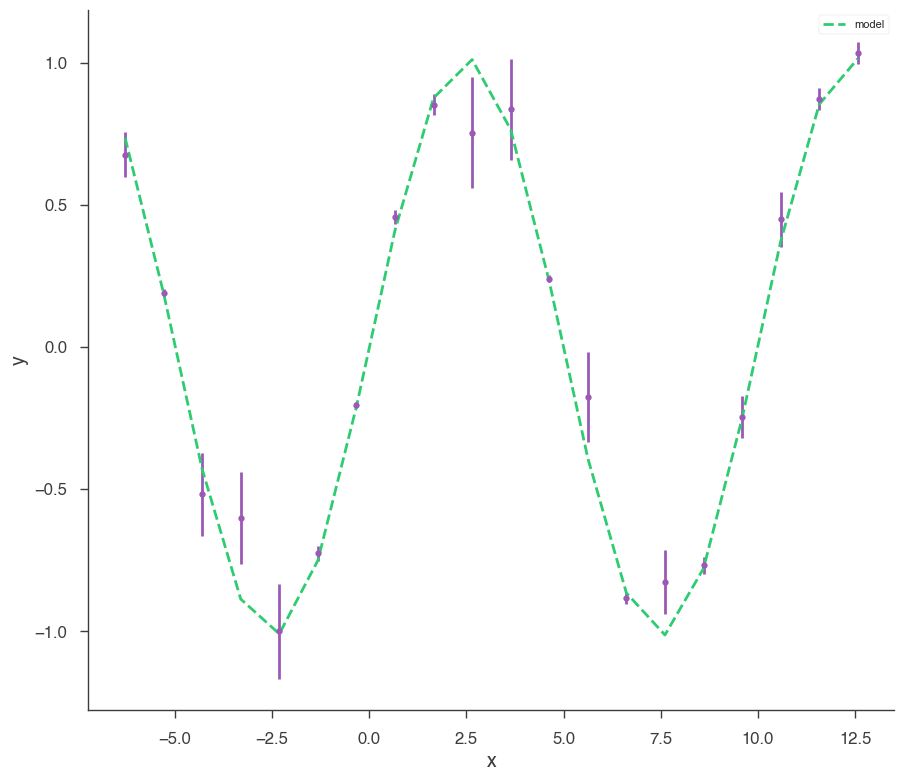

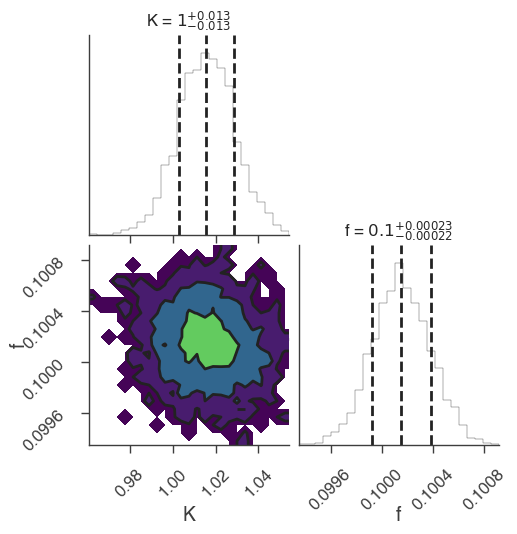

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=135677;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=945992;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -19.353171417562155      +/-  0.15136824473537699     
 Total Likelihood Evaluations:         6766
 Sampling finished. Exiting MultiNest



23:15:22 INFO      fit restored to maximum of posterior                                         ]8;id=307394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=117502;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=977358;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=627190;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.016 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0012 -0.0024 +0.0022) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.20314
total,-9.20314


Values of statistical measures:

,statistical measures
AIC,23.112163
BIC,24.397746
DIC,22.437239
PDIC,2.013588
log(Z),-8.404976


         INFO      deleting the chain directory chains                                     ]8;id=177550;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=711362;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

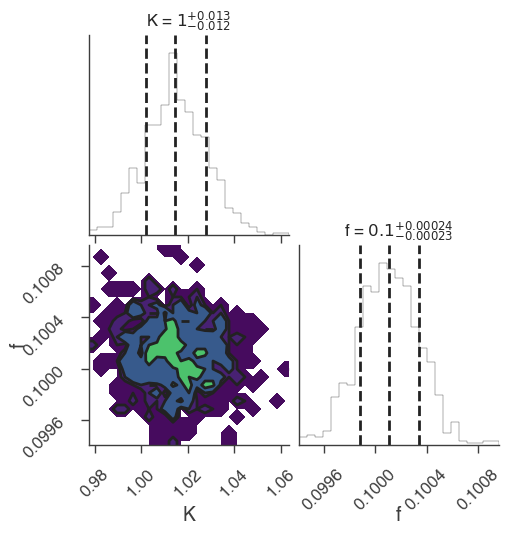

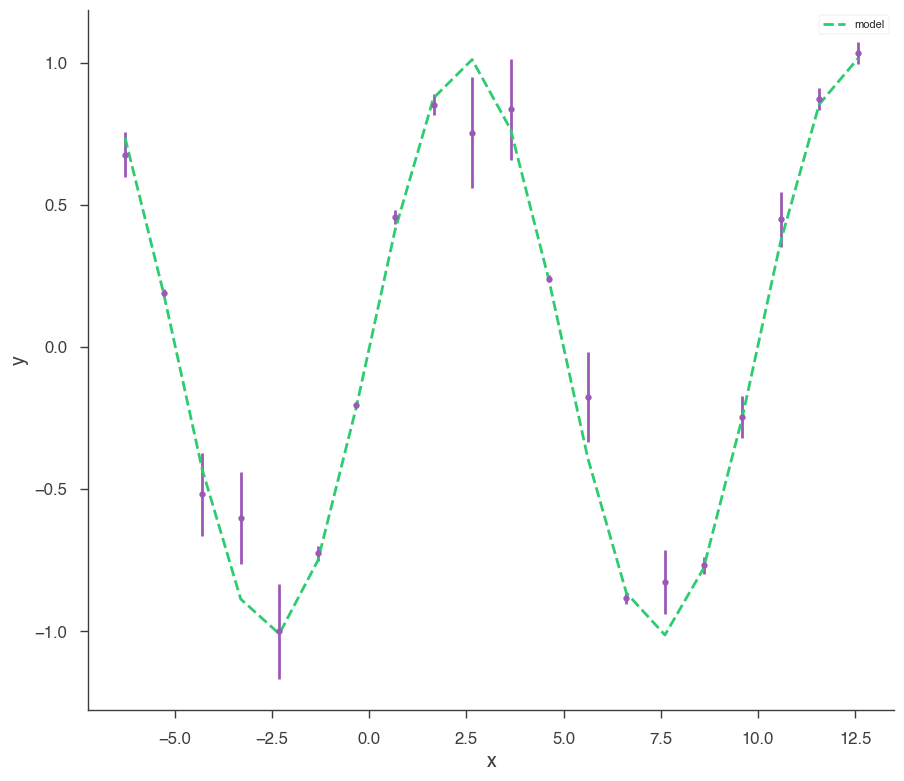

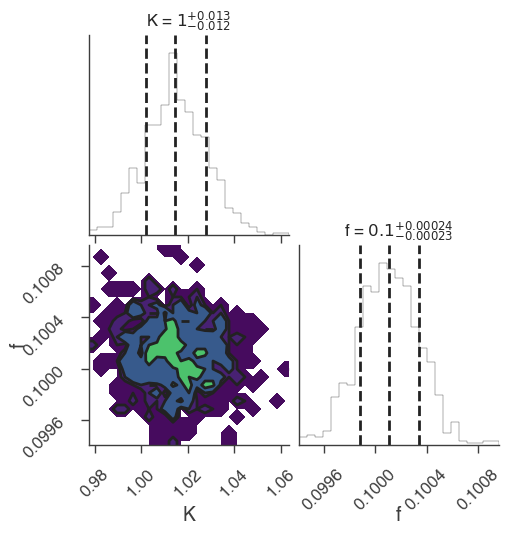

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

23:15:23 INFO      sampler set to dynesty_nested                                           ]8;id=810;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=200190;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

271it [00:00, 2709.16it/s, bound: 0 | nc: 1 | ncall: 778 | eff(%): 34.833 | loglstar:   -inf < -6726.033 <    inf | logz: -6733.394 +/-  0.136 | dlogz: 6734.176 >  0.409]

542it [00:00, 1952.63it/s, bound: 0 | nc: 1 | ncall: 1472 | eff(%): 36.821 | loglstar:   -inf < -4677.841 <    inf | logz: -4685.877 +/-  0.142 | dlogz: 4679.161 >  0.409]

750it [00:00, 1549.50it/s, bound: 0 | nc: 1 | ncall: 2520 | eff(%): 29.762 | loglstar:   -inf < -3584.039 <    inf | logz: -3592.596 +/-  0.146 | dlogz: 3586.764 >  0.409]

917it [00:00, 1291.68it/s, bound: 0 | nc: 1 | ncall: 3978 | eff(%): 23.052 | loglstar:   -inf < -2775.549 <    inf | logz: -2784.521 +/-  0.150 | dlogz: 2777.000 >  0.409]

1055it [00:00, 995.03it/s, bound: 0 | nc: 16 | ncall: 5697 | eff(%): 18.519 | loglstar:   -inf < -2210.684 <    inf | logz: -2219.052 +/-  0.142 | dlogz: 2205.163 >  0.409]

1166it [00:01, 840.67it/s, bound: 0 | nc: 39 | ncall: 7276 | eff(%): 16.025 | loglstar:   -inf < -1542.606 <    inf | logz: -1552.091 +/-  0.151 | dlogz: 1539.527 >  0.409]

1258it [00:01, 645.64it/s, bound: 0 | nc: 40 | ncall: 9182 | eff(%): 13.701 | loglstar:   -inf < -1107.725 <    inf | logz: -1117.230 +/-  0.149 | dlogz: 1103.407 >  0.409]

1332it [00:01, 579.07it/s, bound: 0 | nc: 3 | ncall: 10868 | eff(%): 12.256 | loglstar:   -inf < -898.103 <    inf | logz: -908.094 +/-  0.157 | dlogz: 897.001 >  0.409]   

1396it [00:01, 507.29it/s, bound: 0 | nc: 8 | ncall: 12484 | eff(%): 11.182 | loglstar:   -inf < -811.168 <    inf | logz: -819.884 +/-  0.144 | dlogz: 804.616 >  0.409]

1450it [00:01, 421.46it/s, bound: 0 | nc: 17 | ncall: 14438 | eff(%): 10.043 | loglstar:   -inf < -718.805 <    inf | logz: -728.971 +/-  0.156 | dlogz: 715.560 >  0.409]

1495it [00:02, 394.69it/s, bound: 1 | nc: 1 | ncall: 14618 | eff(%): 10.227 | loglstar:   -inf < -646.963 <    inf | logz: -656.680 +/-  0.153 | dlogz: 641.965 >  0.409] 

1706it [00:02, 719.31it/s, bound: 1 | nc: 4 | ncall: 14969 | eff(%): 11.397 | loglstar:   -inf < -420.260 <    inf | logz: -430.214 +/-  0.152 | dlogz: 417.670 >  0.409]

1799it [00:02, 669.43it/s, bound: 2 | nc: 1 | ncall: 15176 | eff(%): 11.854 | loglstar:   -inf < -339.089 <    inf | logz: -349.081 +/-  0.153 | dlogz: 336.129 >  0.409]

2028it [00:02, 1009.64it/s, bound: 2 | nc: 3 | ncall: 15509 | eff(%): 13.076 | loglstar:   -inf < -189.243 <    inf | logz: -199.222 +/-  0.151 | dlogz: 185.287 >  0.409]

2154it [00:02, 907.73it/s, bound: 3 | nc: 1 | ncall: 15789 | eff(%): 13.642 | loglstar:   -inf < -146.279 <    inf | logz: -156.499 +/-  0.151 | dlogz: 142.181 >  0.409] 

2374it [00:02, 1190.57it/s, bound: 3 | nc: 1 | ncall: 16126 | eff(%): 14.722 | loglstar:   -inf < -87.711 <    inf | logz: -97.630 +/-  0.150 | dlogz: 82.640 >  0.409]  

2517it [00:02, 1031.99it/s, bound: 4 | nc: 1 | ncall: 16416 | eff(%): 15.333 | loglstar:   -inf < -62.236 <    inf | logz: -72.056 +/-  0.152 | dlogz: 56.663 >  0.409]

2734it [00:02, 1281.10it/s, bound: 4 | nc: 1 | ncall: 16740 | eff(%): 16.332 | loglstar:   -inf < -39.213 <    inf | logz: -49.501 +/-  0.153 | dlogz: 33.559 >  0.409]

2885it [00:03, 1086.51it/s, bound: 5 | nc: 1 | ncall: 17040 | eff(%): 16.931 | loglstar:   -inf < -30.050 <    inf | logz: -40.404 +/-  0.153 | dlogz: 24.061 >  0.409]

3094it [00:03, 1303.51it/s, bound: 5 | nc: 3 | ncall: 17389 | eff(%): 17.793 | loglstar:   -inf < -21.865 <    inf | logz: -31.942 +/-  0.151 | dlogz: 15.053 >  0.409]

3247it [00:03, 1124.02it/s, bound: 6 | nc: 3 | ncall: 17666 | eff(%): 18.380 | loglstar:   -inf < -17.508 <    inf | logz: -27.867 +/-  0.153 | dlogz: 10.593 >  0.409]

3460it [00:03, 1343.67it/s, bound: 6 | nc: 1 | ncall: 18017 | eff(%): 19.204 | loglstar:   -inf < -14.027 <    inf | logz: -24.323 +/-  0.152 | dlogz:  6.508 >  0.409]

3616it [00:03, 1174.39it/s, bound: 7 | nc: 1 | ncall: 18284 | eff(%): 19.777 | loglstar:   -inf < -12.369 <    inf | logz: -22.632 +/-  0.152 | dlogz:  4.438 >  0.409]

3811it [00:03, 1346.54it/s, bound: 7 | nc: 2 | ncall: 18621 | eff(%): 20.466 | loglstar:   -inf < -11.049 <    inf | logz: -21.322 +/-  0.152 | dlogz:  2.696 >  0.409]

3964it [00:04, 1121.51it/s, bound: 8 | nc: 1 | ncall: 18887 | eff(%): 20.988 | loglstar:   -inf < -10.457 <    inf | logz: -20.670 +/-  0.152 | dlogz:  1.775 >  0.409]

4162it [00:04, 1306.99it/s, bound: 8 | nc: 3 | ncall: 19216 | eff(%): 21.659 | loglstar:   -inf < -9.952 <    inf | logz: -20.146 +/-  0.152 | dlogz:  1.018 >  0.409] 

4313it [00:04, 1115.33it/s, bound: 9 | nc: 3 | ncall: 19474 | eff(%): 22.147 | loglstar:   -inf < -9.711 <    inf | logz: -19.888 +/-  0.152 | dlogz:  0.661 >  0.409]

4483it [00:04, 1242.49it/s, +41 | bound: 9 | nc: 1 | ncall: 19804 | eff(%): 22.891 | loglstar:   -inf < -9.502 <    inf | logz: -19.661 +/-  0.152 | dlogz:  0.363 >  0.409]

4483it [00:04, 999.25it/s, +400 | bound: 9 | nc: 1 | ncall: 20163 | eff(%): 24.708 | loglstar:   -inf < -9.188 <    inf | logz: -19.345 +/-  0.151 | dlogz:  0.001 >  0.409]

23:15:28 INFO      fit restored to maximum of posterior                                         ]8;id=985085;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=119859;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=891912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=867533;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 +/- 0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0012 -0.0024 +0.0025) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.203028
total,-9.203028


Values of statistical measures:

,statistical measures
AIC,23.111939
BIC,24.397521
DIC,22.249716
PDIC,1.921091
log(Z),-8.401288


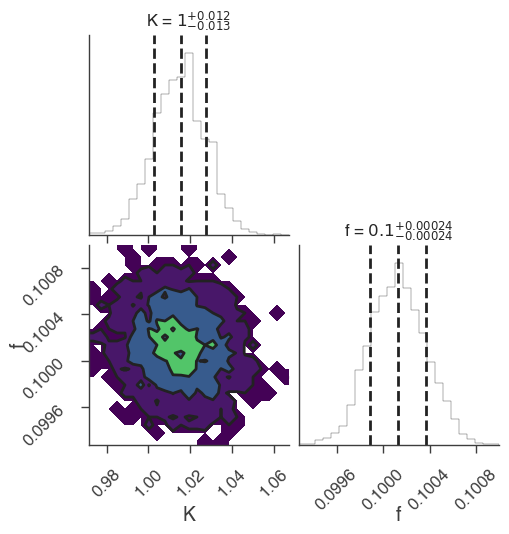

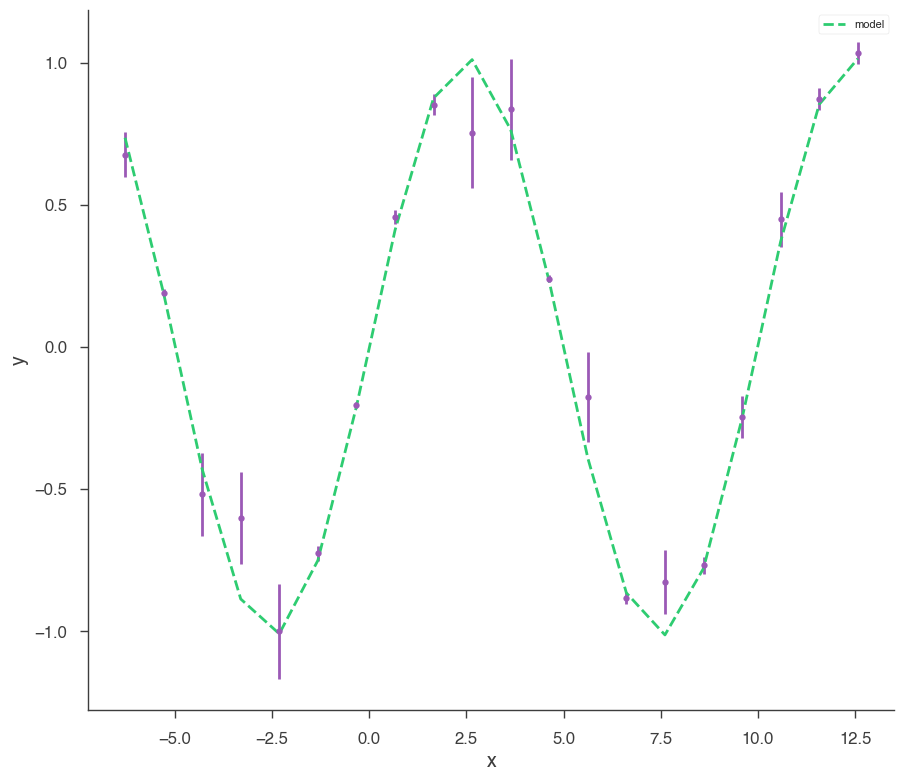

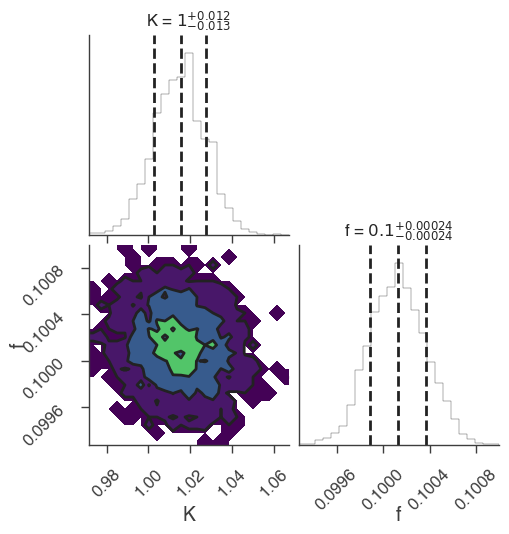

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=223453;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=933878;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

124it [00:00, 1236.09it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 139 | eff(%): 19.405 | loglstar:   -inf < -11307.695 <    inf | logz: -11314.851 +/-  0.120 | dlogz: 11305.538 >  0.010]

344it [00:00, 1795.41it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 487 | eff(%): 34.853 | loglstar:   -inf < -6946.976 <    inf | logz: -6953.792 +/-  0.114 | dlogz: 6930.532 >  0.010]   

528it [00:00, 1812.92it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 876 | eff(%): 38.372 | loglstar:   -inf < -5572.735 <    inf | logz: -5580.697 +/-  0.126 | dlogz: 5565.720 >  0.010]

710it [00:00, 1581.33it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 1541 | eff(%): 34.787 | loglstar:   -inf < -4541.818 <    inf | logz: -4550.100 +/-  0.127 | dlogz: 4541.437 >  0.010]

872it [00:00, 1344.71it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2327 | eff(%): 30.845 | loglstar:   -inf < -3879.561 <    inf | logz: -3887.507 +/-  0.122 | dlogz: 3876.063 >  0.010] 

1013it [00:00, 1189.08it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 3073 | eff(%): 28.352 | loglstar:   -inf < -3279.555 <    inf | logz: -3288.011 +/-  0.125 | dlogz: 3276.571 >  0.010]

1138it [00:00, 971.40it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 4119 | eff(%): 24.637 | loglstar:   -inf < -2842.156 <    inf | logz: -2851.328 +/-  0.135 | dlogz: 2843.402 >  0.010] 

1244it [00:01, 751.89it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 5530 | eff(%): 20.630 | loglstar:   -inf < -2448.051 <    inf | logz: -2457.436 +/-  0.137 | dlogz: 2449.520 >  0.010]

1330it [00:01, 602.66it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 6984 | eff(%): 17.771 | loglstar:   -inf < -2191.078 <    inf | logz: -2200.636 +/-  0.138 | dlogz: 2192.734 >  0.010] 

1401it [00:01, 561.76it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 7997 | eff(%): 16.488 | loglstar:   -inf < -1845.408 <    inf | logz: -1855.094 +/-  0.138 | dlogz: 1845.648 >  0.010]

1464it [00:01, 547.20it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 8874 | eff(%): 15.618 | loglstar:   -inf < -1514.207 <    inf | logz: -1523.973 +/-  0.138 | dlogz: 1513.595 >  0.010]

1523it [00:01, 496.59it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10111 | eff(%): 14.353 | loglstar:   -inf < -1282.778 <    inf | logz: -1292.232 +/-  0.133 | dlogz: 1279.914 >  0.010]

1576it [00:02, 443.63it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 11427 | eff(%): 13.214 | loglstar:   -inf < -1137.732 <    inf | logz: -1147.750 +/-  0.140 | dlogz: 1137.536 >  0.010]

1622it [00:02, 390.92it/s, batch: 0 | bound: 0 | nc: 51 | ncall: 12579 | eff(%): 12.402 | loglstar:   -inf < -1019.803 <    inf | logz: -1029.865 +/-  0.140 | dlogz: 1018.826 >  0.010]

1663it [00:02, 376.91it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 13564 | eff(%): 11.825 | loglstar:   -inf < -923.110 <    inf | logz: -932.927 +/-  0.137 | dlogz: 920.525 >  0.010]   

1702it [00:02, 309.91it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 15084 | eff(%): 10.921 | loglstar:   -inf < -875.420 <    inf | logz: -883.935 +/-  0.128 | dlogz: 870.062 >  0.010]

1735it [00:02, 283.68it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 15997 | eff(%): 10.517 | loglstar:   -inf < -806.565 <    inf | logz: -816.206 +/-  0.135 | dlogz: 803.179 >  0.010] 

1765it [00:02, 281.39it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 16914 | eff(%): 10.136 | loglstar:   -inf < -765.774 <    inf | logz: -775.999 +/-  0.140 | dlogz: 763.942 >  0.010]

1794it [00:02, 235.83it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17323 | eff(%): 10.066 | loglstar:   -inf < -730.072 <    inf | logz: -738.769 +/-  0.129 | dlogz: 724.707 >  0.010] 

2005it [00:03, 631.58it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17636 | eff(%): 11.055 | loglstar:   -inf < -500.603 <    inf | logz: -510.271 +/-  0.134 | dlogz: 496.160 >  0.010]

2186it [00:03, 904.26it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17978 | eff(%): 11.830 | loglstar:   -inf < -351.349 <    inf | logz: -360.850 +/-  0.135 | dlogz: 346.055 >  0.010]

2297it [00:03, 785.44it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18152 | eff(%): 12.315 | loglstar:   -inf < -290.826 <    inf | logz: -300.444 +/-  0.134 | dlogz: 286.958 >  0.010]

2505it [00:03, 1077.37it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18488 | eff(%): 13.193 | loglstar:   -inf < -197.096 <    inf | logz: -207.042 +/-  0.138 | dlogz: 193.154 >  0.010]

2662it [00:03, 914.36it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18818 | eff(%): 13.780 | loglstar:   -inf < -146.628 <    inf | logz: -156.805 +/-  0.136 | dlogz: 142.536 >  0.010] 

2913it [00:03, 1249.16it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 19180 | eff(%): 14.802 | loglstar:   -inf < -91.543 <    inf | logz: -101.713 +/-  0.136 | dlogz: 86.848 >  0.010] 

3080it [00:03, 1345.73it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19567 | eff(%): 15.349 | loglstar:   -inf < -67.985 <    inf | logz: -78.021 +/-  0.134 | dlogz: 62.765 >  0.010] 

3237it [00:04, 926.84it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19754 | eff(%): 15.982 | loglstar:   -inf < -51.668 <    inf | logz: -61.840 +/-  0.136 | dlogz: 46.257 >  0.010] 

3421it [00:04, 1099.83it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20067 | eff(%): 16.633 | loglstar:   -inf < -37.850 <    inf | logz: -48.196 +/-  0.136 | dlogz: 32.232 >  0.010]

3564it [00:04, 943.19it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20344 | eff(%): 17.098 | loglstar:   -inf < -31.470 <    inf | logz: -41.820 +/-  0.135 | dlogz: 25.552 >  0.010] 

3800it [00:04, 1222.14it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20717 | eff(%): 17.910 | loglstar:   -inf < -22.837 <    inf | logz: -33.045 +/-  0.136 | dlogz: 16.287 >  0.010]

3959it [00:04, 1044.61it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21070 | eff(%): 18.354 | loglstar:   -inf < -19.287 <    inf | logz: -29.477 +/-  0.135 | dlogz: 12.394 >  0.010]

4217it [00:04, 1352.56it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21432 | eff(%): 19.228 | loglstar:   -inf < -15.152 <    inf | logz: -25.373 +/-  0.136 | dlogz:  7.767 >  0.010]

4387it [00:05, 1428.73it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21790 | eff(%): 19.681 | loglstar:   -inf < -13.542 <    inf | logz: -23.730 +/-  0.135 | dlogz:  5.784 >  0.010]

4556it [00:05, 1206.46it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22015 | eff(%): 20.235 | loglstar:   -inf < -12.286 <    inf | logz: -22.513 +/-  0.136 | dlogz:  4.240 >  0.010]

4758it [00:05, 1380.96it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22342 | eff(%): 20.830 | loglstar:   -inf < -11.322 <    inf | logz: -21.496 +/-  0.136 | dlogz:  2.862 >  0.010]

4919it [00:05, 1165.03it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22633 | eff(%): 21.264 | loglstar:   -inf < -10.773 <    inf | logz: -20.962 +/-  0.136 | dlogz:  2.080 >  0.010]

5138it [00:05, 1384.31it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 22939 | eff(%): 21.921 | loglstar:   -inf < -10.258 <    inf | logz: -20.456 +/-  0.136 | dlogz:  1.316 >  0.010]

5309it [00:05, 1460.45it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23288 | eff(%): 22.318 | loglstar:   -inf < -9.970 <    inf | logz: -20.184 +/-  0.136 | dlogz:  0.906 >  0.010] 

5474it [00:05, 1179.99it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23517 | eff(%): 22.792 | loglstar:   -inf < -9.747 <    inf | logz: -19.990 +/-  0.136 | dlogz:  0.628 >  0.010]

5666it [00:06, 1341.74it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23854 | eff(%): 23.265 | loglstar:   -inf < -9.567 <    inf | logz: -19.829 +/-  0.136 | dlogz:  0.411 >  0.010]

5821it [00:06, 1094.38it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24141 | eff(%): 23.623 | loglstar:   -inf < -9.450 <    inf | logz: -19.735 +/-  0.136 | dlogz:  0.292 >  0.010]

6094it [00:06, 1437.79it/s, batch: 0 | bound: 10 | nc: 10 | ncall: 24556 | eff(%): 24.322 | loglstar:   -inf < -9.342 <    inf | logz: -19.626 +/-  0.136 | dlogz:  0.162 >  0.010]

6267it [00:06, 1211.63it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24882 | eff(%): 24.691 | loglstar:   -inf < -9.298 <    inf | logz: -19.582 +/-  0.136 | dlogz:  0.113 >  0.010] 

6480it [00:06, 1404.12it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25194 | eff(%): 25.220 | loglstar:   -inf < -9.259 <    inf | logz: -19.545 +/-  0.136 | dlogz:  0.072 >  0.010]

6646it [00:06, 1164.66it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25572 | eff(%): 25.491 | loglstar:   -inf < -9.239 <    inf | logz: -19.525 +/-  0.136 | dlogz:  0.052 >  0.010]

6868it [00:06, 1383.70it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25878 | eff(%): 26.037 | loglstar:   -inf < -9.220 <    inf | logz: -19.507 +/-  0.136 | dlogz:  0.033 >  0.010]

7043it [00:07, 1466.72it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26245 | eff(%): 26.334 | loglstar:   -inf < -9.211 <    inf | logz: -19.498 +/-  0.136 | dlogz:  0.023 >  0.010]

7211it [00:07, 1173.98it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26487 | eff(%): 26.720 | loglstar:   -inf < -9.205 <    inf | logz: -19.491 +/-  0.136 | dlogz:  0.016 >  0.010]

7409it [00:07, 1344.57it/s, batch: 0 | bound: 13 | nc: 3 | ncall: 26805 | eff(%): 27.134 | loglstar:   -inf < -9.199 <    inf | logz: -19.486 +/-  0.136 | dlogz:  0.011 >  0.010]

7930it [00:07, 2247.62it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27365 | eff(%): 28.950 | loglstar:   -inf < -9.188 <    inf | logz: -19.475 +/-  0.136 | dlogz:  0.001 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8197it [00:08, 878.20it/s, batch: 1 | bound: 2 | nc: 7 | ncall: 27726 | eff(%): 29.028 | loglstar: -11.131 < -10.345 < -9.682 | logz: -19.475 +/-  0.140 | stop:  1.399]          

8394it [00:08, 995.08it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 28119 | eff(%): 29.318 | loglstar: -11.131 < -9.972 < -9.682 | logz: -19.475 +/-  0.140 | stop:  1.399] 

8586it [00:08, 964.52it/s, batch: 1 | bound: 3 | nc: 3 | ncall: 28384 | eff(%): 29.713 | loglstar: -11.131 < -9.717 < -9.682 | logz: -19.475 +/-  0.140 | stop:  1.399]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9118it [00:09, 740.26it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28945 | eff(%): 31.501 | loglstar: -11.691 < -9.639 < -11.126 | logz: -19.459 +/-  0.115 | stop:  1.116]

9482it [00:09, 997.58it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29342 | eff(%): 32.013 | loglstar: -11.691 < -10.186 < -11.126 | logz: -19.459 +/-  0.115 | stop:  1.116]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9747it [00:10, 767.76it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29619 | eff(%): 32.908 | loglstar: -11.691 < -9.196 < -11.126 | logz: -19.459 +/-  0.115 | stop:  0.938] 

9747it [00:10, 959.63it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29619 | eff(%): 32.908 | loglstar: -11.691 < -9.196 < -11.126 | logz: -19.459 +/-  0.115 | stop:  0.938]

23:15:39 INFO      fit restored to maximum of posterior                                         ]8;id=707364;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=904230;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=17580;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=219648;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 +/- 0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0012 -0.0024 +0.0025) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.203023
total,-9.203023


Values of statistical measures:

,statistical measures
AIC,23.111928
BIC,24.397510
DIC,22.459820
PDIC,2.026821
log(Z),-8.440973


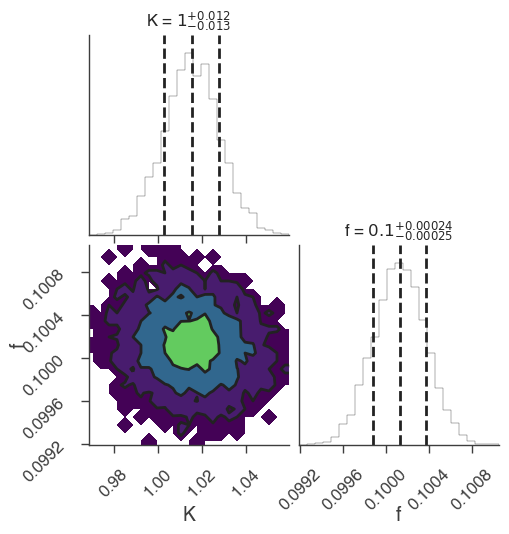

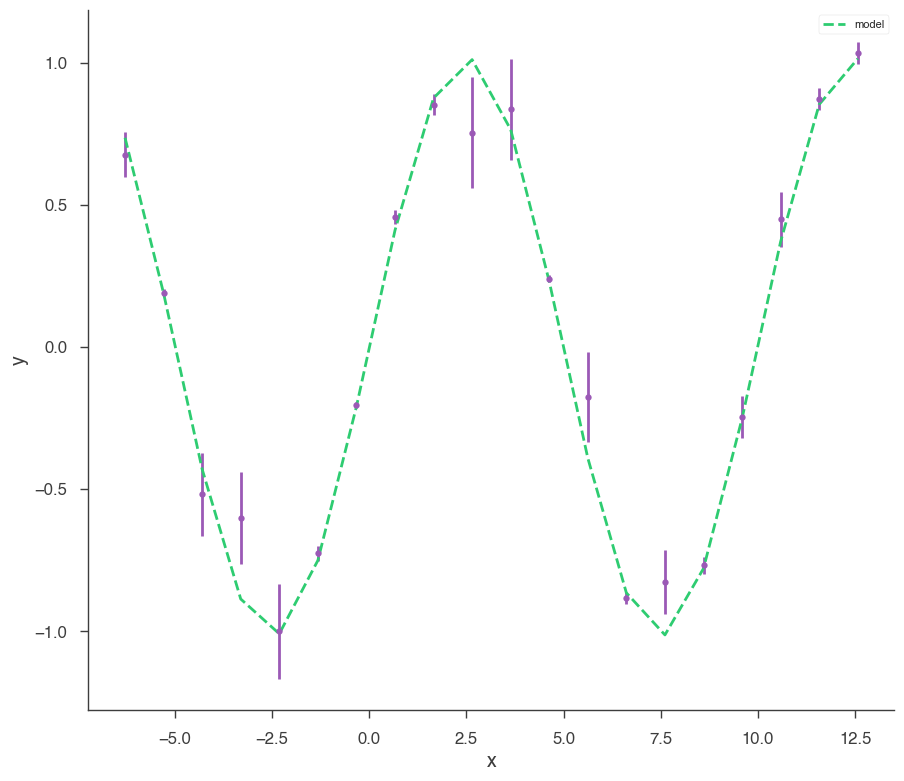

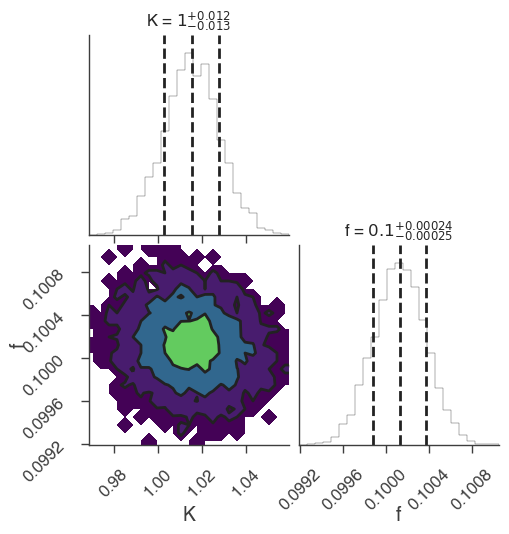

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

23:15:40 INFO      sampler set to zeus                                                     ]8;id=369662;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=366345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 54.25it/s]

Sampling progress :   2%|▏         | 14/625 [00:00<00:09, 64.59it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:08, 73.03it/s]

Sampling progress :   5%|▍         | 31/625 [00:00<00:08, 71.80it/s]

Sampling progress :   6%|▌         | 39/625 [00:00<00:08, 70.68it/s]

Sampling progress :   8%|▊         | 47/625 [00:00<00:08, 71.89it/s]

Sampling progress :   9%|▉         | 57/625 [00:00<00:07, 78.13it/s]

Sampling progress :  10%|█         | 65/625 [00:00<00:07, 74.73it/s]

Sampling progress :  12%|█▏        | 74/625 [00:01<00:07, 76.46it/s]

Sampling progress :  13%|█▎        | 82/625 [00:01<00:07, 76.89it/s]

Sampling progress :  15%|█▍        | 91/625 [00:01<00:06, 79.38it/s]

Sampling progress :  16%|█▌        | 99/625 [00:01<00:06, 77.19it/s]

Sampling progress :  17%|█▋        | 107/625 [00:01<00:06, 77.33it/s]

Sampling progress :  18%|█▊        | 115/625 [00:01<00:06, 74.35it/s]

Sampling progress :  20%|█▉        | 123/625 [00:01<00:07, 69.76it/s]

Sampling progress :  21%|██        | 131/625 [00:01<00:06, 72.25it/s]

Sampling progress :  22%|██▏       | 139/625 [00:01<00:06, 72.44it/s]

Sampling progress :  24%|██▎       | 147/625 [00:02<00:06, 68.72it/s]

Sampling progress :  25%|██▍       | 156/625 [00:02<00:06, 72.84it/s]

Sampling progress :  26%|██▌       | 164/625 [00:02<00:06, 72.49it/s]

Sampling progress :  28%|██▊       | 172/625 [00:02<00:06, 72.99it/s]

Sampling progress :  29%|██▉       | 181/625 [00:02<00:05, 76.70it/s]

Sampling progress :  30%|███       | 189/625 [00:02<00:06, 72.65it/s]

Sampling progress :  32%|███▏      | 197/625 [00:02<00:05, 73.55it/s]

Sampling progress :  33%|███▎      | 205/625 [00:02<00:05, 73.16it/s]

Sampling progress :  34%|███▍      | 213/625 [00:02<00:05, 71.79it/s]

Sampling progress :  35%|███▌      | 221/625 [00:03<00:05, 72.85it/s]

Sampling progress :  37%|███▋      | 229/625 [00:03<00:05, 73.93it/s]

Sampling progress :  38%|███▊      | 237/625 [00:03<00:05, 72.44it/s]

Sampling progress :  39%|███▉      | 245/625 [00:03<00:05, 71.64it/s]

Sampling progress :  40%|████      | 253/625 [00:03<00:05, 73.74it/s]

Sampling progress :  42%|████▏     | 262/625 [00:03<00:04, 76.13it/s]

Sampling progress :  43%|████▎     | 271/625 [00:03<00:04, 78.73it/s]

Sampling progress :  45%|████▍     | 279/625 [00:03<00:04, 76.07it/s]

Sampling progress :  46%|████▌     | 287/625 [00:03<00:04, 75.64it/s]

Sampling progress :  47%|████▋     | 295/625 [00:03<00:04, 76.41it/s]

Sampling progress :  48%|████▊     | 303/625 [00:04<00:04, 76.51it/s]

Sampling progress :  50%|████▉     | 311/625 [00:04<00:04, 72.92it/s]

Sampling progress :  51%|█████     | 319/625 [00:04<00:04, 73.16it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:04<00:04, 73.75it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:04<00:03, 75.50it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:04<00:03, 78.88it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:04<00:03, 81.19it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:04<00:03, 81.73it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:04<00:03, 78.08it/s]

Sampling progress :  61%|██████    | 379/625 [00:05<00:03, 75.77it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:05<00:03, 77.74it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:05<00:02, 78.44it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:05<00:02, 78.83it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:05<00:02, 76.37it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:05<00:02, 78.20it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:05<00:02, 80.33it/s]

Sampling progress :  71%|███████   | 441/625 [00:05<00:02, 79.54it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:05<00:02, 77.69it/s]

Sampling progress :  73%|███████▎  | 457/625 [00:06<00:02, 77.31it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:06<00:02, 77.35it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:06<00:02, 75.38it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:06<00:01, 73.35it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:06<00:01, 75.82it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:06<00:01, 78.04it/s]

Sampling progress :  81%|████████  | 507/625 [00:06<00:01, 76.61it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:06<00:01, 76.73it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:06<00:01, 74.17it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:07<00:01, 69.18it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:07<00:01, 69.36it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:07<00:01, 69.26it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:07<00:01, 66.16it/s]

Sampling progress :  90%|████████▉ | 560/625 [00:07<00:00, 69.63it/s]

Sampling progress :  91%|█████████ | 569/625 [00:07<00:00, 74.54it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:07<00:00, 72.71it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:07<00:00, 74.14it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:07<00:00, 73.60it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:08<00:00, 76.52it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:08<00:00, 79.15it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:08<00:00, 76.06it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 74.72it/s]

23:15:48 INFO      fit restored to maximum of posterior                                         ]8;id=546422;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=620252;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=918089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=116173;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 20


Scale Factor: 1.390374


Mean Integrated Autocorrelation Time: 2.58


Effective Sample Size: 4842.92


Number of Log Probability Evaluations: 64949


Effective Samples per Log Probability Evaluation: 0.074565


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0012 +/- 0.0024) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.203035
total,-9.203035


Values of statistical measures:

,statistical measures
AIC,23.111953
BIC,24.397535
DIC,22.409574
PDIC,2.001786


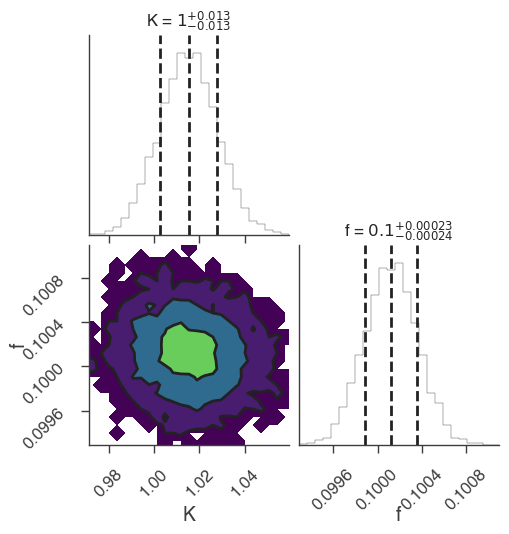

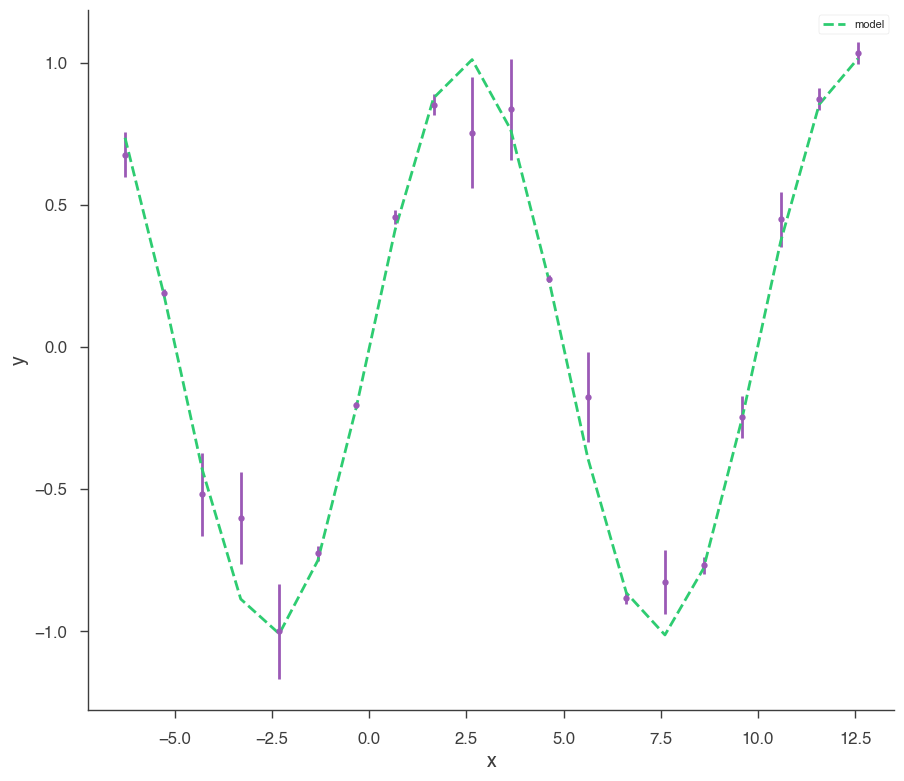

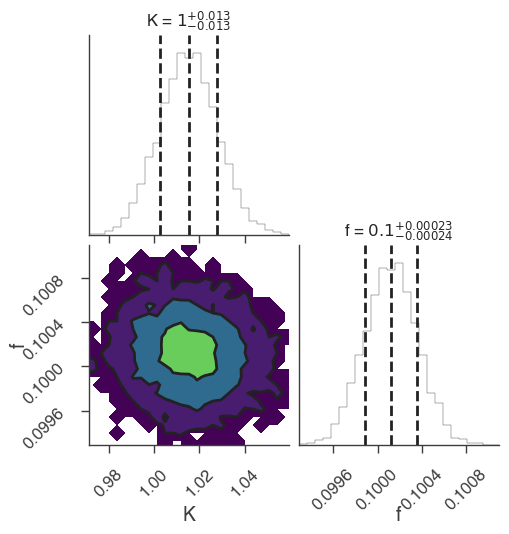

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

23:15:49 INFO      sampler set to ultranest                                                ]8;id=506589;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=185022;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 8810


[ultranest]   logZ = -19.45 +- 0.1246


[ultranest] Effective samples strategy satisfied (ESS = 972.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


23:15:57 INFO      fit restored to maximum of posterior                                         ]8;id=384364;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=532123;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=666656;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=440567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0014 -0.0025 +0.0023) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.204549
total,-9.204549


Values of statistical measures:

,statistical measures
AIC,23.114980
BIC,24.400562
DIC,22.430911
PDIC,2.012264
log(Z),-8.456885


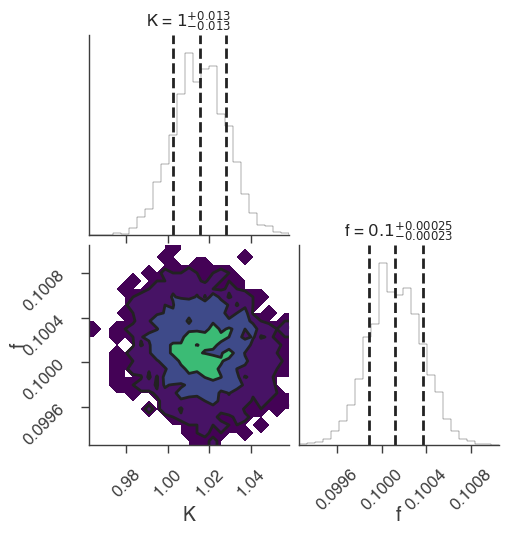

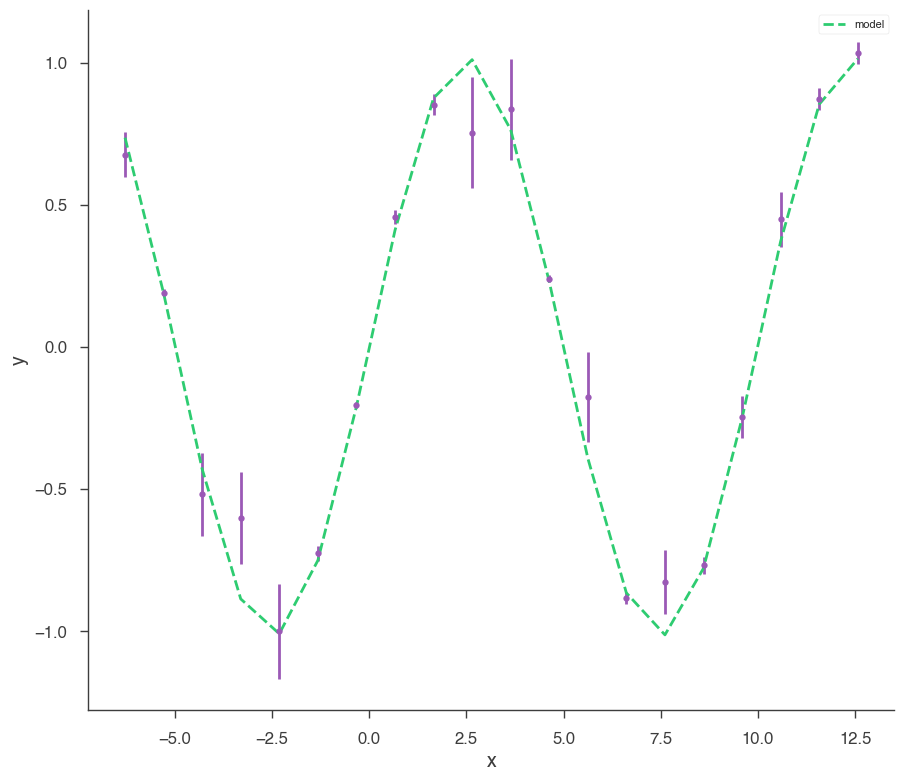

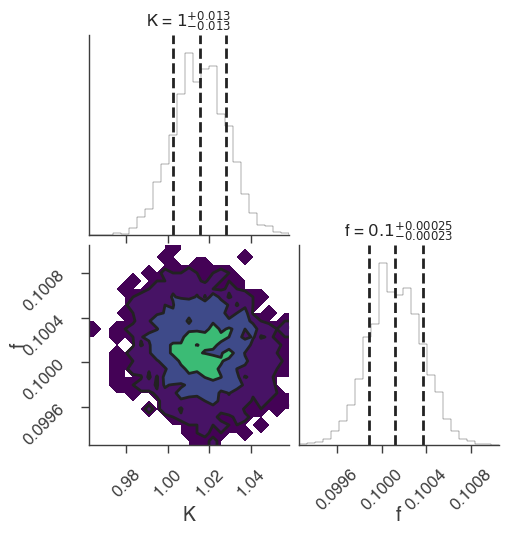

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()